In [20]:
import pandas as pd


## 📌 Extração


In [21]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [22]:
# Normalizando colunas

df_to_concat = df[['customerID','Churn']]
df_to_concat

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


In [23]:

df_customer = pd.json_normalize(df['customer'])
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [24]:
df_phone = pd.json_normalize(df['phone'])
df_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [25]:
df_internet = pd.json_normalize(df['internet'])
df_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [26]:
df_account = pd.json_normalize(df['account'])
df_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [27]:
df_final = pd.concat([df_to_concat,df_customer,df_phone,df_internet,df_account],axis=1)
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## 🔧 Transformação


In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [29]:
# Verificando se ha dados duplicados
df_final.duplicated().sum()

np.int64(0)

In [30]:
df_final['Churn'].unique()
df_final = df_final[df_final['Churn'] != '']
df_final['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Convertendo tipo de dados

df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)
df_final['Charges.Total']

C:\Users\matheus.brito\AppData\Local\Temp\ipykernel_31240\2509798842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
C:\Users\matheus.brito\AppData\Local\Temp\ipykernel_31240\2509798842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)


0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7262     742.90
7263    1873.70
7264      92.75
7265    4627.65
7266    3707.60
Name: Charges.Total, Length: 7043, dtype: float64

In [32]:
# Convertendo a colunas para numero binario 
mapa_conversao = {
    'Yes': 1, 
    'No': 0,
    'No internet service': 0,
    'No phone service': 0
}

df_final = df_final.replace(mapa_conversao)
df_final.head()


C:\Users\matheus.brito\AppData\Local\Temp\ipykernel_31240\3250170772.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final = df_final.replace(mapa_conversao)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [33]:
# Criando a coluna 'Contas_Diarias' para analises futuras 
df_final['Contas_Diarias'] = (df_final['Charges.Monthly'] / 30).round(2)
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [34]:
df_final.duplicated().sum()

np.int64(0)

In [35]:
df_final = df_final.set_index('customerID')

## 📊 Carga e análise


In [36]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68


In [37]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


C:\Users\matheus.brito\AppData\Local\Temp\ipykernel_31240\4239162441.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total', y='Assinatura', data=df_servico, palette="dark:#5A9_r")


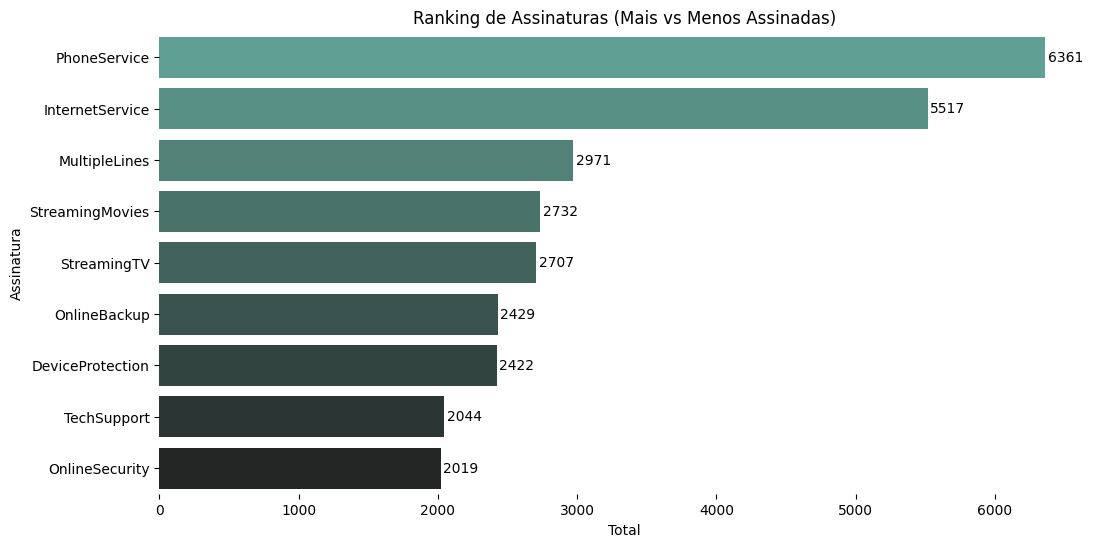

In [38]:
# Qual e a assinatura mais e menos contratada pelos clientes

# Analise

servicos =  ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies']

contagem = {}

for i in servicos:
    if i == 'InternetService':
        total = df_final[i].isin(['DSL', 'Fiber optic']).sum()
    else:
        total = (df_final[i] == 1).sum()
    contagem[i] = total

df_servico = pd.DataFrame(list(contagem.items()), columns=['Assinatura', 'Total'])
df_servico = df_servico.sort_values(by='Total', ascending=False)
df_servico

# Gerando grafico 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Total', y='Assinatura', data=df_servico, palette="dark:#5A9_r")
plt.title('Ranking de Assinaturas (Mais vs Menos Assinadas)')

for i, v in enumerate(df_servico['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')
ax.set_frame_on(False)

plt.show()

In [39]:
# Churn por Tipo de Contrato

resumo_churn = df_final.groupby('Contract')['Churn'].agg(['count', 'sum', 'mean']).reset_index()
resumo_churn

,Contract,count,sum,mean
0,Month-to-month,3875,1655,0.427097
1,One year,1473,166,0.112695
2,Two year,1695,48,0.028319


C:\Users\matheus.brito\AppData\Local\Temp\ipykernel_31240\2204840538.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resumo, x='Tipo de Contrato', y='Total de Clientes', palette='rocket', ax=ax1)


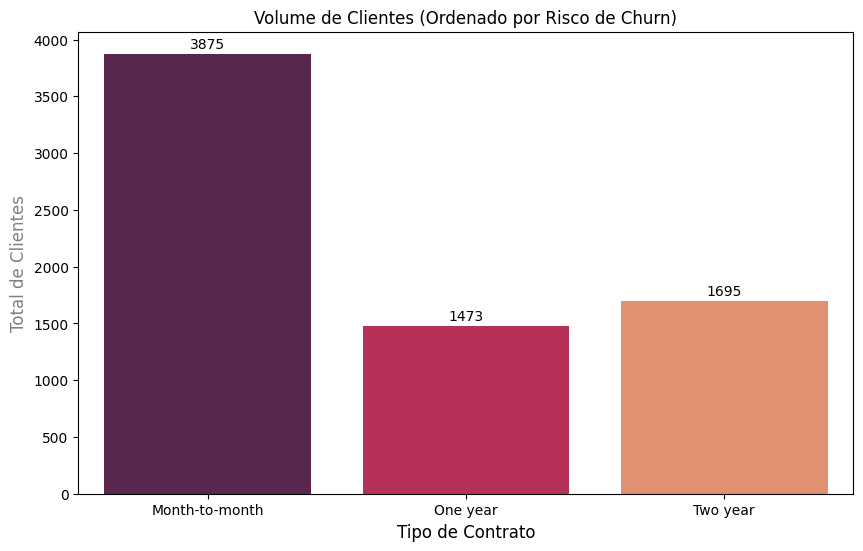

In [40]:

resumo_churn.columns = ['Tipo de Contrato', 'Total de Clientes', 'Cancelamentos', 'Taxa de Churn (%)']
resumo = resumo_churn.sort_values('Taxa de Churn (%)', ascending=False)
resumo


import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(data=resumo, x='Tipo de Contrato', y='Total de Clientes', palette='rocket', ax=ax1)

ax1.set_ylabel('Total de Clientes', color='grey', fontsize=12)
ax1.set_xlabel('Tipo de Contrato', fontsize=12)
ax1.set_title('Volume de Clientes (Ordenado por Risco de Churn)')


for i, v in enumerate(resumo['Total de Clientes']):
    ax1.text(i, v + 50, str(int(v)), color='black', ha='center', fontweight = 'light')

plt.show()

In [41]:
# Forma de pagamento mais utilizada pelos clientes 

df_fpagamentos = df_final['PaymentMethod'].value_counts().reset_index()
df_fpagamentos

,PaymentMethod,count
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


C:\Users\matheus.brito\AppData\Local\Temp\ipykernel_31240\1643152537.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Total de Clientes', y='Forma de Pagamento', data=df_fpagamentos, palette='Blues_d')


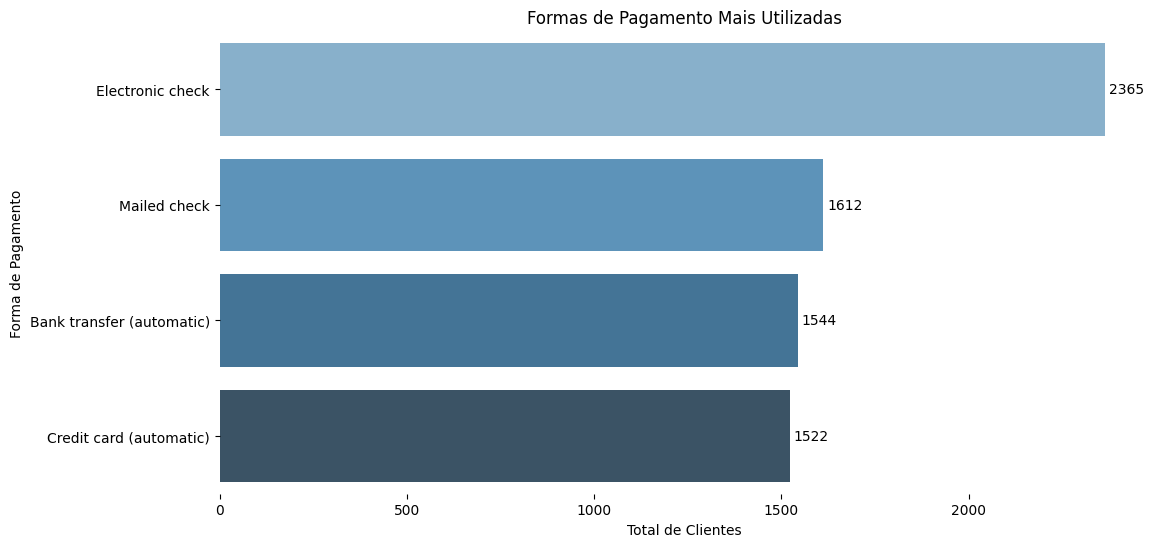

In [42]:
df_fpagamentos.columns = ['Forma de Pagamento', 'Total de Clientes']
df_fpagamentos

# Grafico 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Invertemos X e Y para os nomes caberem na tela
ax = sns.barplot(x='Total de Clientes', y='Forma de Pagamento', data=df_fpagamentos, palette='Blues_d')

plt.title('Formas de Pagamento Mais Utilizadas')
sns.despine(left=True, bottom=True)

# Colocar os números ao lado das barras
for i, v in enumerate(df_fpagamentos['Total de Clientes']):
    # v + 10 empurra o texto um pouquinho para a direita
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='light')

plt.show()

In [43]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68


C:\Users\matheus.brito\AppData\Local\Temp\ipykernel_31240\794874366.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y='Charges.Monthly', data=df_final, palette='Set2',
C:\Users\matheus.brito\AppData\Local\Temp\ipykernel_31240\794874366.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Cliente Fiel (0)', 'Cancelou (1)'], fontsize=12)


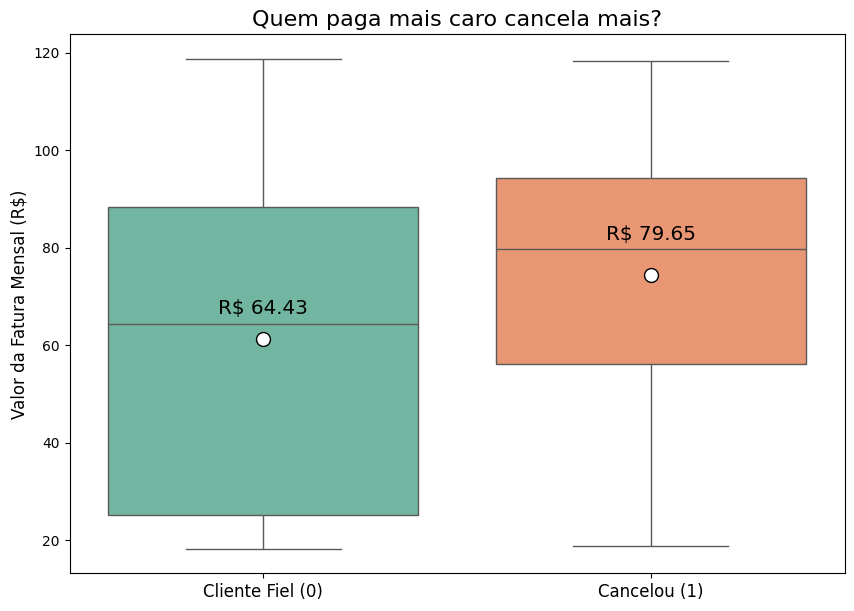

In [44]:
# Quem paga mais por mês tem mais chance de cancelar (Churn)?

media_pagamento = df_final.groupby('Churn')['Charges.Monthly'].mean()
media_pagamento

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

ax = sns.boxplot(x='Churn', y='Charges.Monthly', data=df_final, palette='Set2', 
                 showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", "m"
                 "arkeredgecolor":"black", "markersize":"10"})

ax.set_xticklabels(['Cliente Fiel (0)', 'Cancelou (1)'], fontsize=12)
plt.title('Quem paga mais caro cancela mais?', fontsize=16)
plt.ylabel('Valor da Fatura Mensal (R$)', fontsize=12)
plt.xlabel('')


medianas = df_final.groupby('Churn')['Charges.Monthly'].median().values

for i, valor in enumerate(medianas):
    ax.text(i, valor + 2, f'R$ {valor:.2f}', 
            horizontalalignment='center', size='x-large', color='black', weight='light')

plt.show()

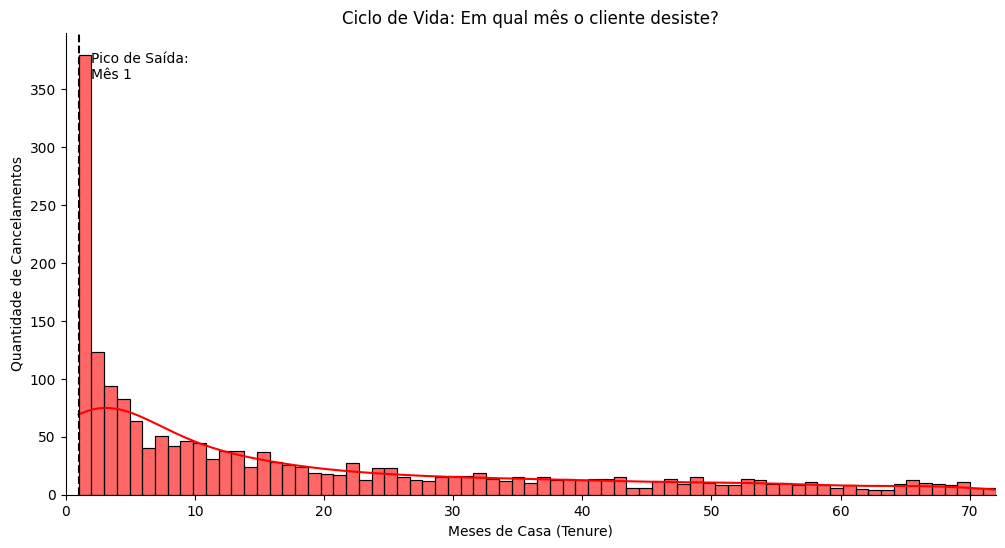

In [45]:
#Ciclo de Vida (Tenure): Analisar em qual mês o cliente costuma desistir

import matplotlib.pyplot as plt
import seaborn as sns

df_churn_desistencia = df_final[df_final['Churn'] == 1]

# 2. Configurar o gráfico
plt.figure(figsize=(12, 6))

ax = sns.histplot(data=df_churn_desistencia, x='tenure', bins=72, kde=True, color='red', alpha=0.6)

plt.title('Ciclo de Vida: Em qual mês o cliente desiste?')
plt.xlabel('Meses de Casa (Tenure)')
plt.ylabel('Quantidade de Cancelamentos')
plt.xlim(0, 72) 

sns.despine()

pico_mes = df_churn_desistencia['tenure'].mode()[0]
plt.axvline(pico_mes, color='black', linestyle='--')
plt.text(pico_mes + 1, ax.get_ylim()[1]*0.9, f'Pico de Saída:\nMês {pico_mes}', color='black')

plt.show()

Top Correlações com Churn:
 Churn               1.000000
Contas_Diarias      0.193412
Charges.Monthly     0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
StreamingTV         0.063228
StreamingMovies     0.061382
MultipleLines       0.040102
PhoneService        0.011942
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
Charges.Total      -0.198324
tenure             -0.352229
Name: Churn, dtype: float64


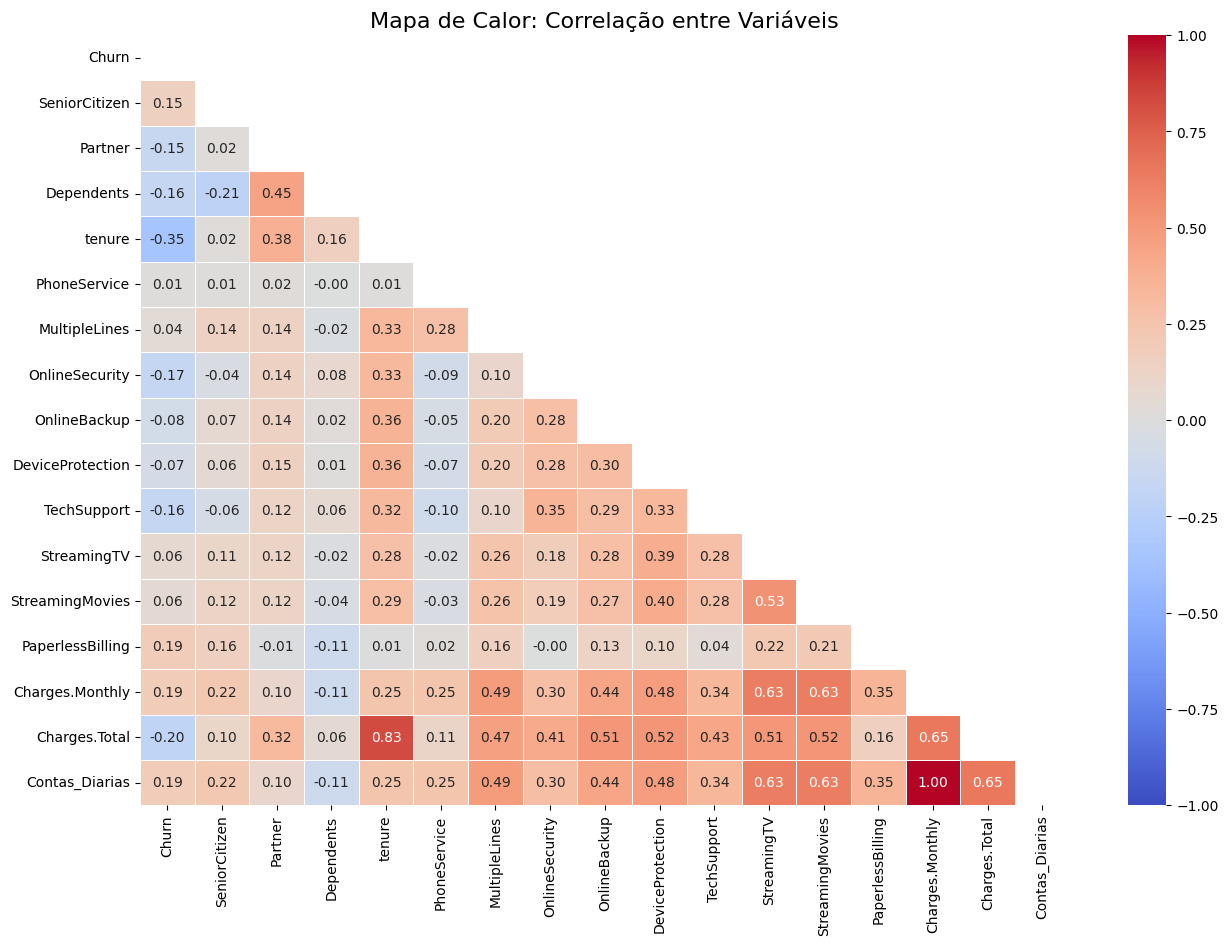

In [48]:

# ANÁLISE DE CORRELAÇÃO 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

colunas_numericas = df_final.select_dtypes(include=[np.number])

matriz_correlacao = colunas_numericas.corr()

correlacao_churn = matriz_correlacao['Churn'].sort_values(ascending=False)
print("Top Correlações com Churn:\n", correlacao_churn)

plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(matriz_correlacao, dtype=bool))

sns.heatmap(matriz_correlacao, 
            mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            vmax=1, 
            vmin=-1, 
            center=0,
            linewidths=.5)

plt.title('Mapa de Calor: Correlação entre Variáveis', fontsize=16)
plt.show()